In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.autonotebook import tqdm
import matplotlib as mpl
import os
import re
from matplotlib import pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('train.csv')
train_data.shape

(19661, 5)

In [3]:
train_data.columns

Index(['Id', 'pub_title', 'dataset_title', 'dataset_label', 'cleaned_label'], dtype='object')

In [4]:
train_data.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


In [6]:
train_data['pub_title'].unique()

array(['The Impact of Dual Enrollment on College Degree Attainment: Do Low-SES Students Benefit?',
       'Educational Attainment of High School Dropouts 8 Years Later. Issue Brief. NCES 2005-026.',
       'Differences in Outcomes for Female and Male Students in Special Education',
       ...,
       'MCCS: a novel recognition pattern-based method for fast track discovery of anti-SARS-CoV-2 drugs',
       'Quantitative Structure–Activity Relationship Machine Learning Models and their Applications for Identifying Viral 3CLpro- and RdRp-Targeting Compounds as Potential Therapeutics for COVID-19 and Related Viral Infections',
       'A ligand-based computational drug repurposing pipeline using KNIME and Programmatic Data Access: case studies for rare diseases and COVID-19'],
      dtype=object)

In [7]:
for i in train_data.columns:
    print(str(i)+":"+str(len(train_data[i].unique())))

Id:14316
pub_title:14271
dataset_title:45
dataset_label:130
cleaned_label:130


In [8]:
pub_title_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(train_data['pub_title'])))
dataset_title_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(train_data['dataset_title'])))
dataset_label_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(train_data['dataset_label'])))
cleaned_label_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(train_data['cleaned_label'])))

Text(0.5, 1.0, 'Cleaned Label')

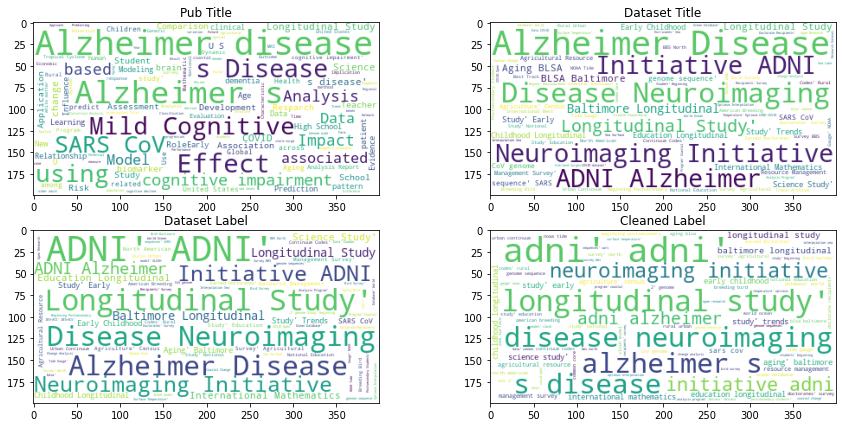

In [9]:
fig, axs = plt.subplots(2,2,figsize = (15,7))
axs[0][0].set_title("Pub Title")
axs[0][0].imshow(pub_title_wordcloud)

axs[0][1].imshow(dataset_title_wordcloud)
axs[0][1].set_title("Dataset Title")

axs[1][0].imshow(dataset_label_wordcloud)
axs[1][0].set_title("Dataset Label")

axs[1][1].imshow(cleaned_label_wordcloud)
axs[1][1].set_title("Cleaned Label")

In [10]:
pub_title_dataset=str(list(train_data['pub_title'])).lower().split()
pub_title_data=[word for word in pub_title_dataset if not word in str(set(STOPWORDS))]

dataset_title_dataset=str(list(train_data['dataset_title'])).lower().split()
dataset_title_data=[word for word in dataset_title_dataset if not word in str(set(STOPWORDS))]

dataset_label_dataset=str(list(train_data['dataset_label'])).lower().split()
dataset_label_data=[word for word in dataset_label_dataset if not word in str(set(STOPWORDS))]

cleaned_label_dataset=str(list(train_data['cleaned_label'])).lower().split()
cleaned_label_data=[word for word in cleaned_label_dataset if not word in str(set(STOPWORDS))]

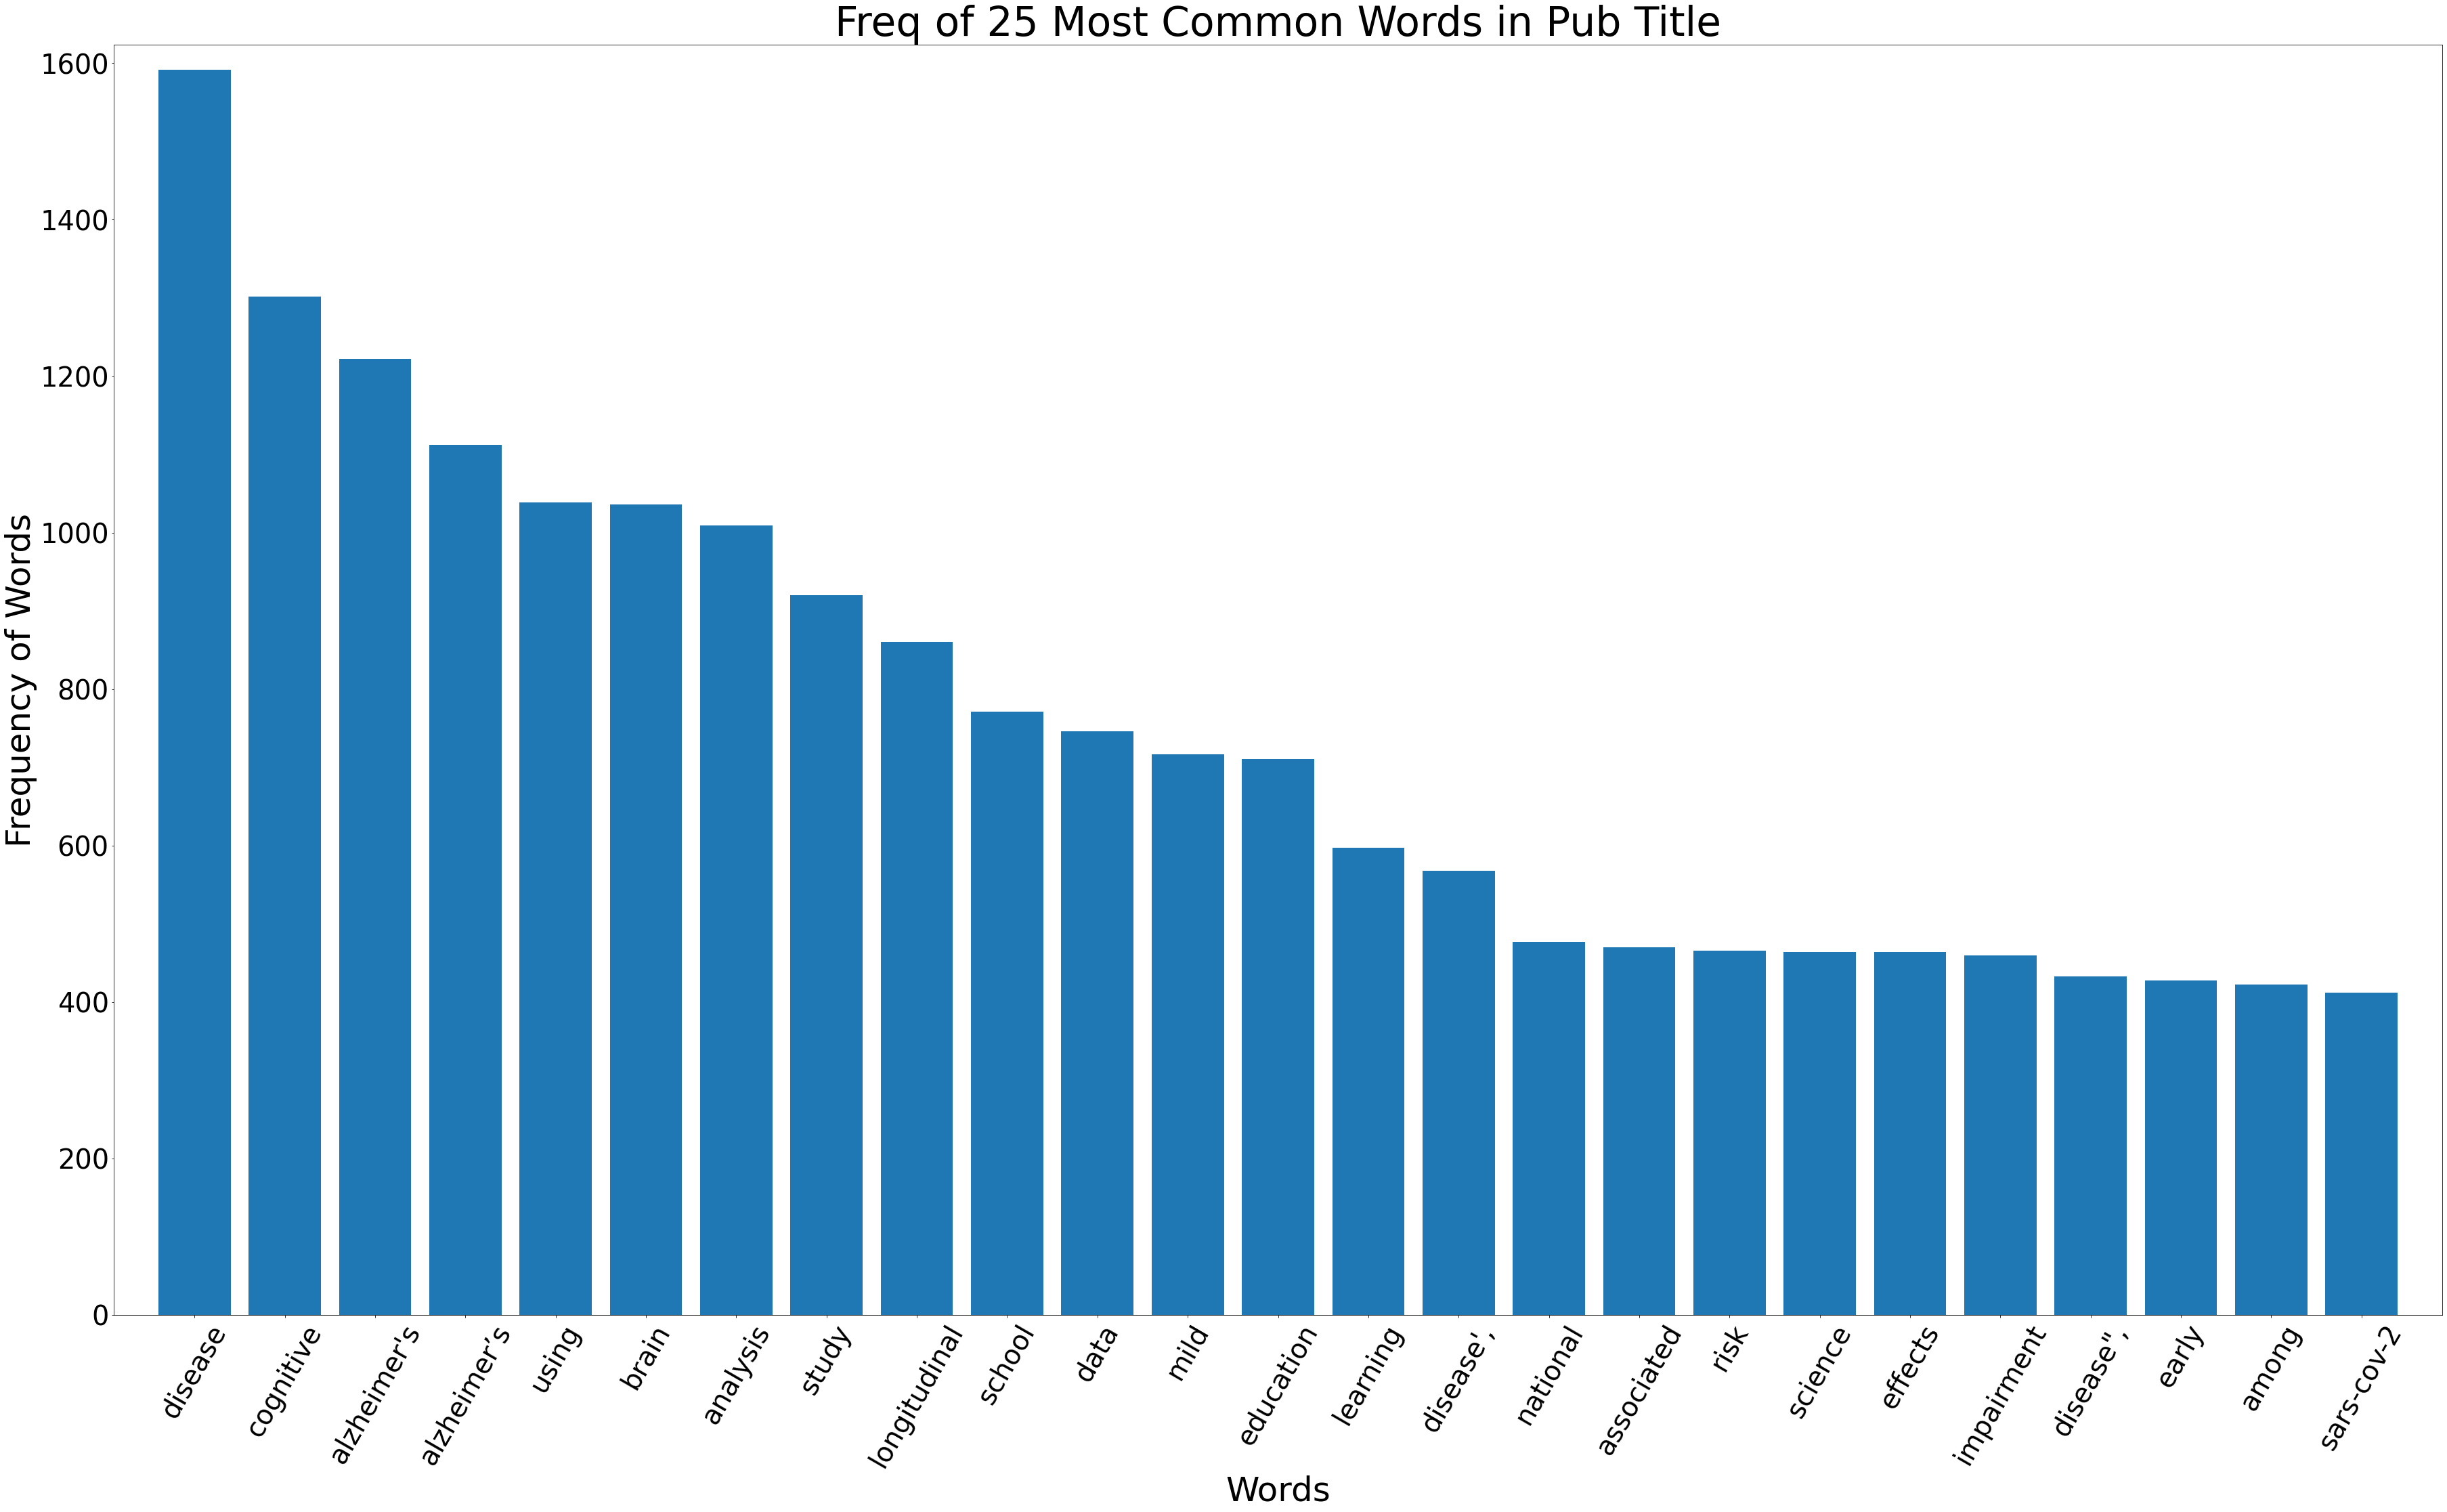

In [11]:
x,y = zip(*Counter(pub_title_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Pub Title', fontsize=60)
plt.show()

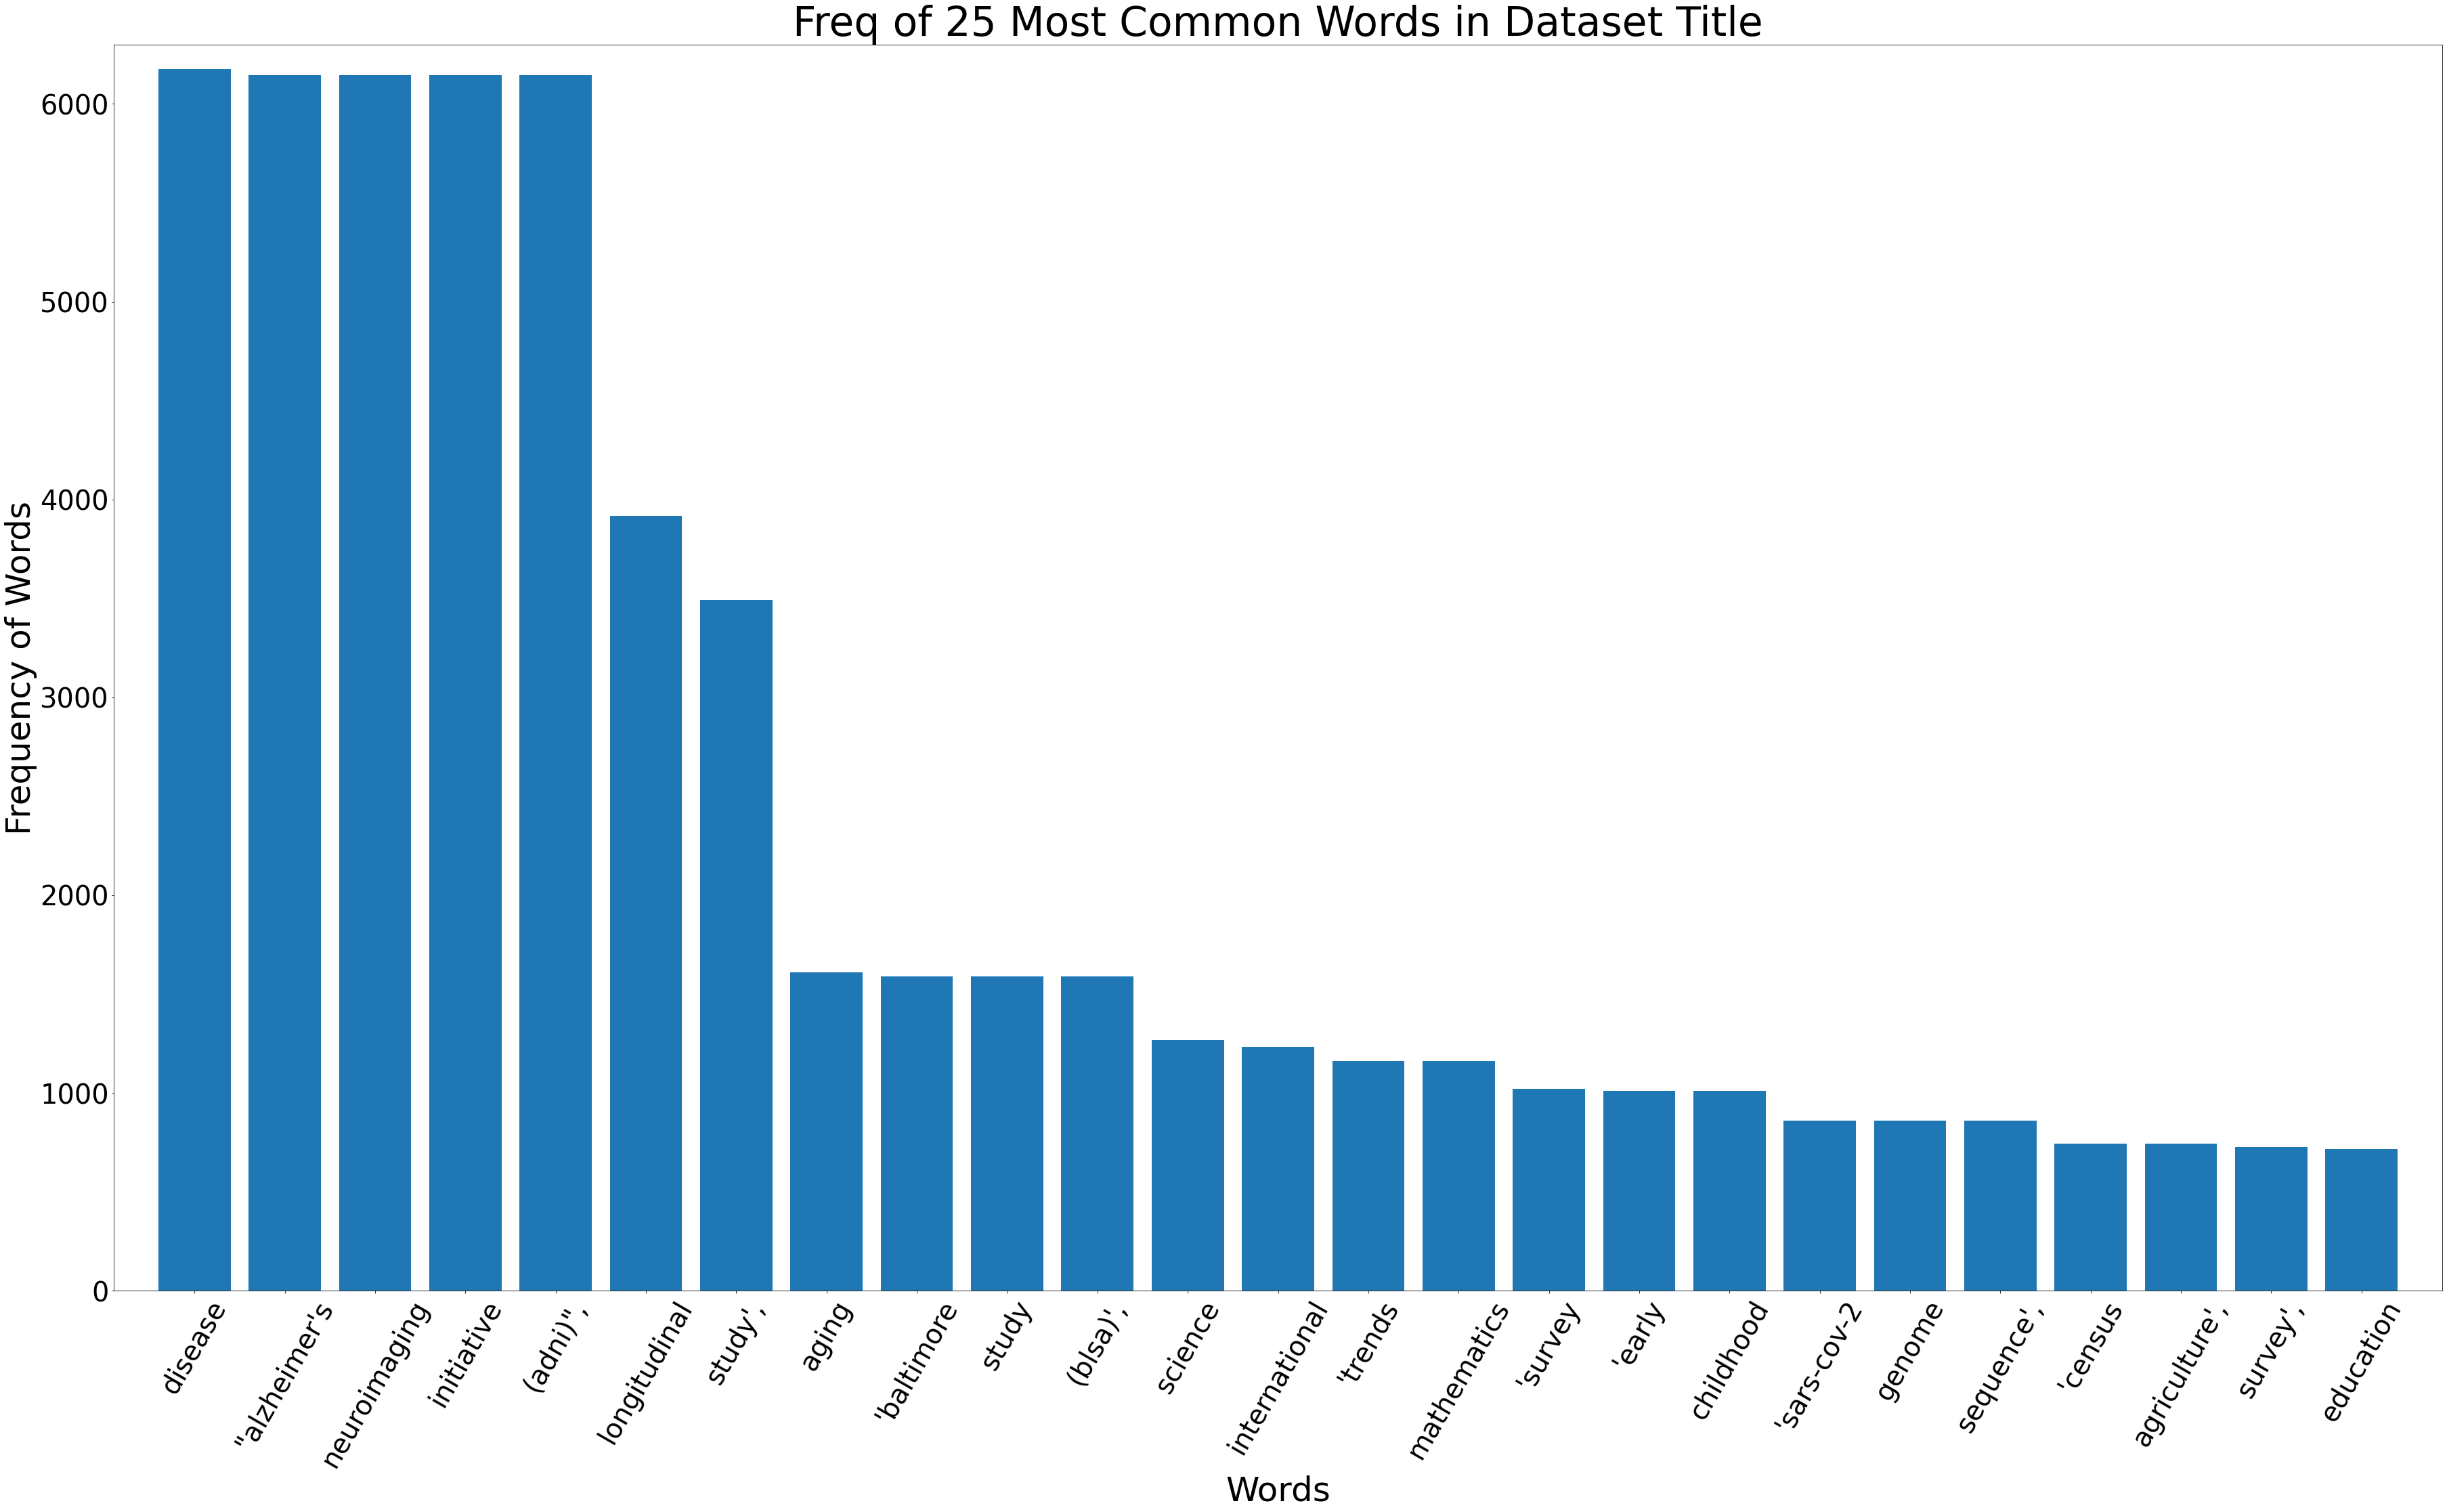

In [12]:
x,y = zip(*Counter(dataset_title_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Dataset Title', fontsize=60)
plt.show()

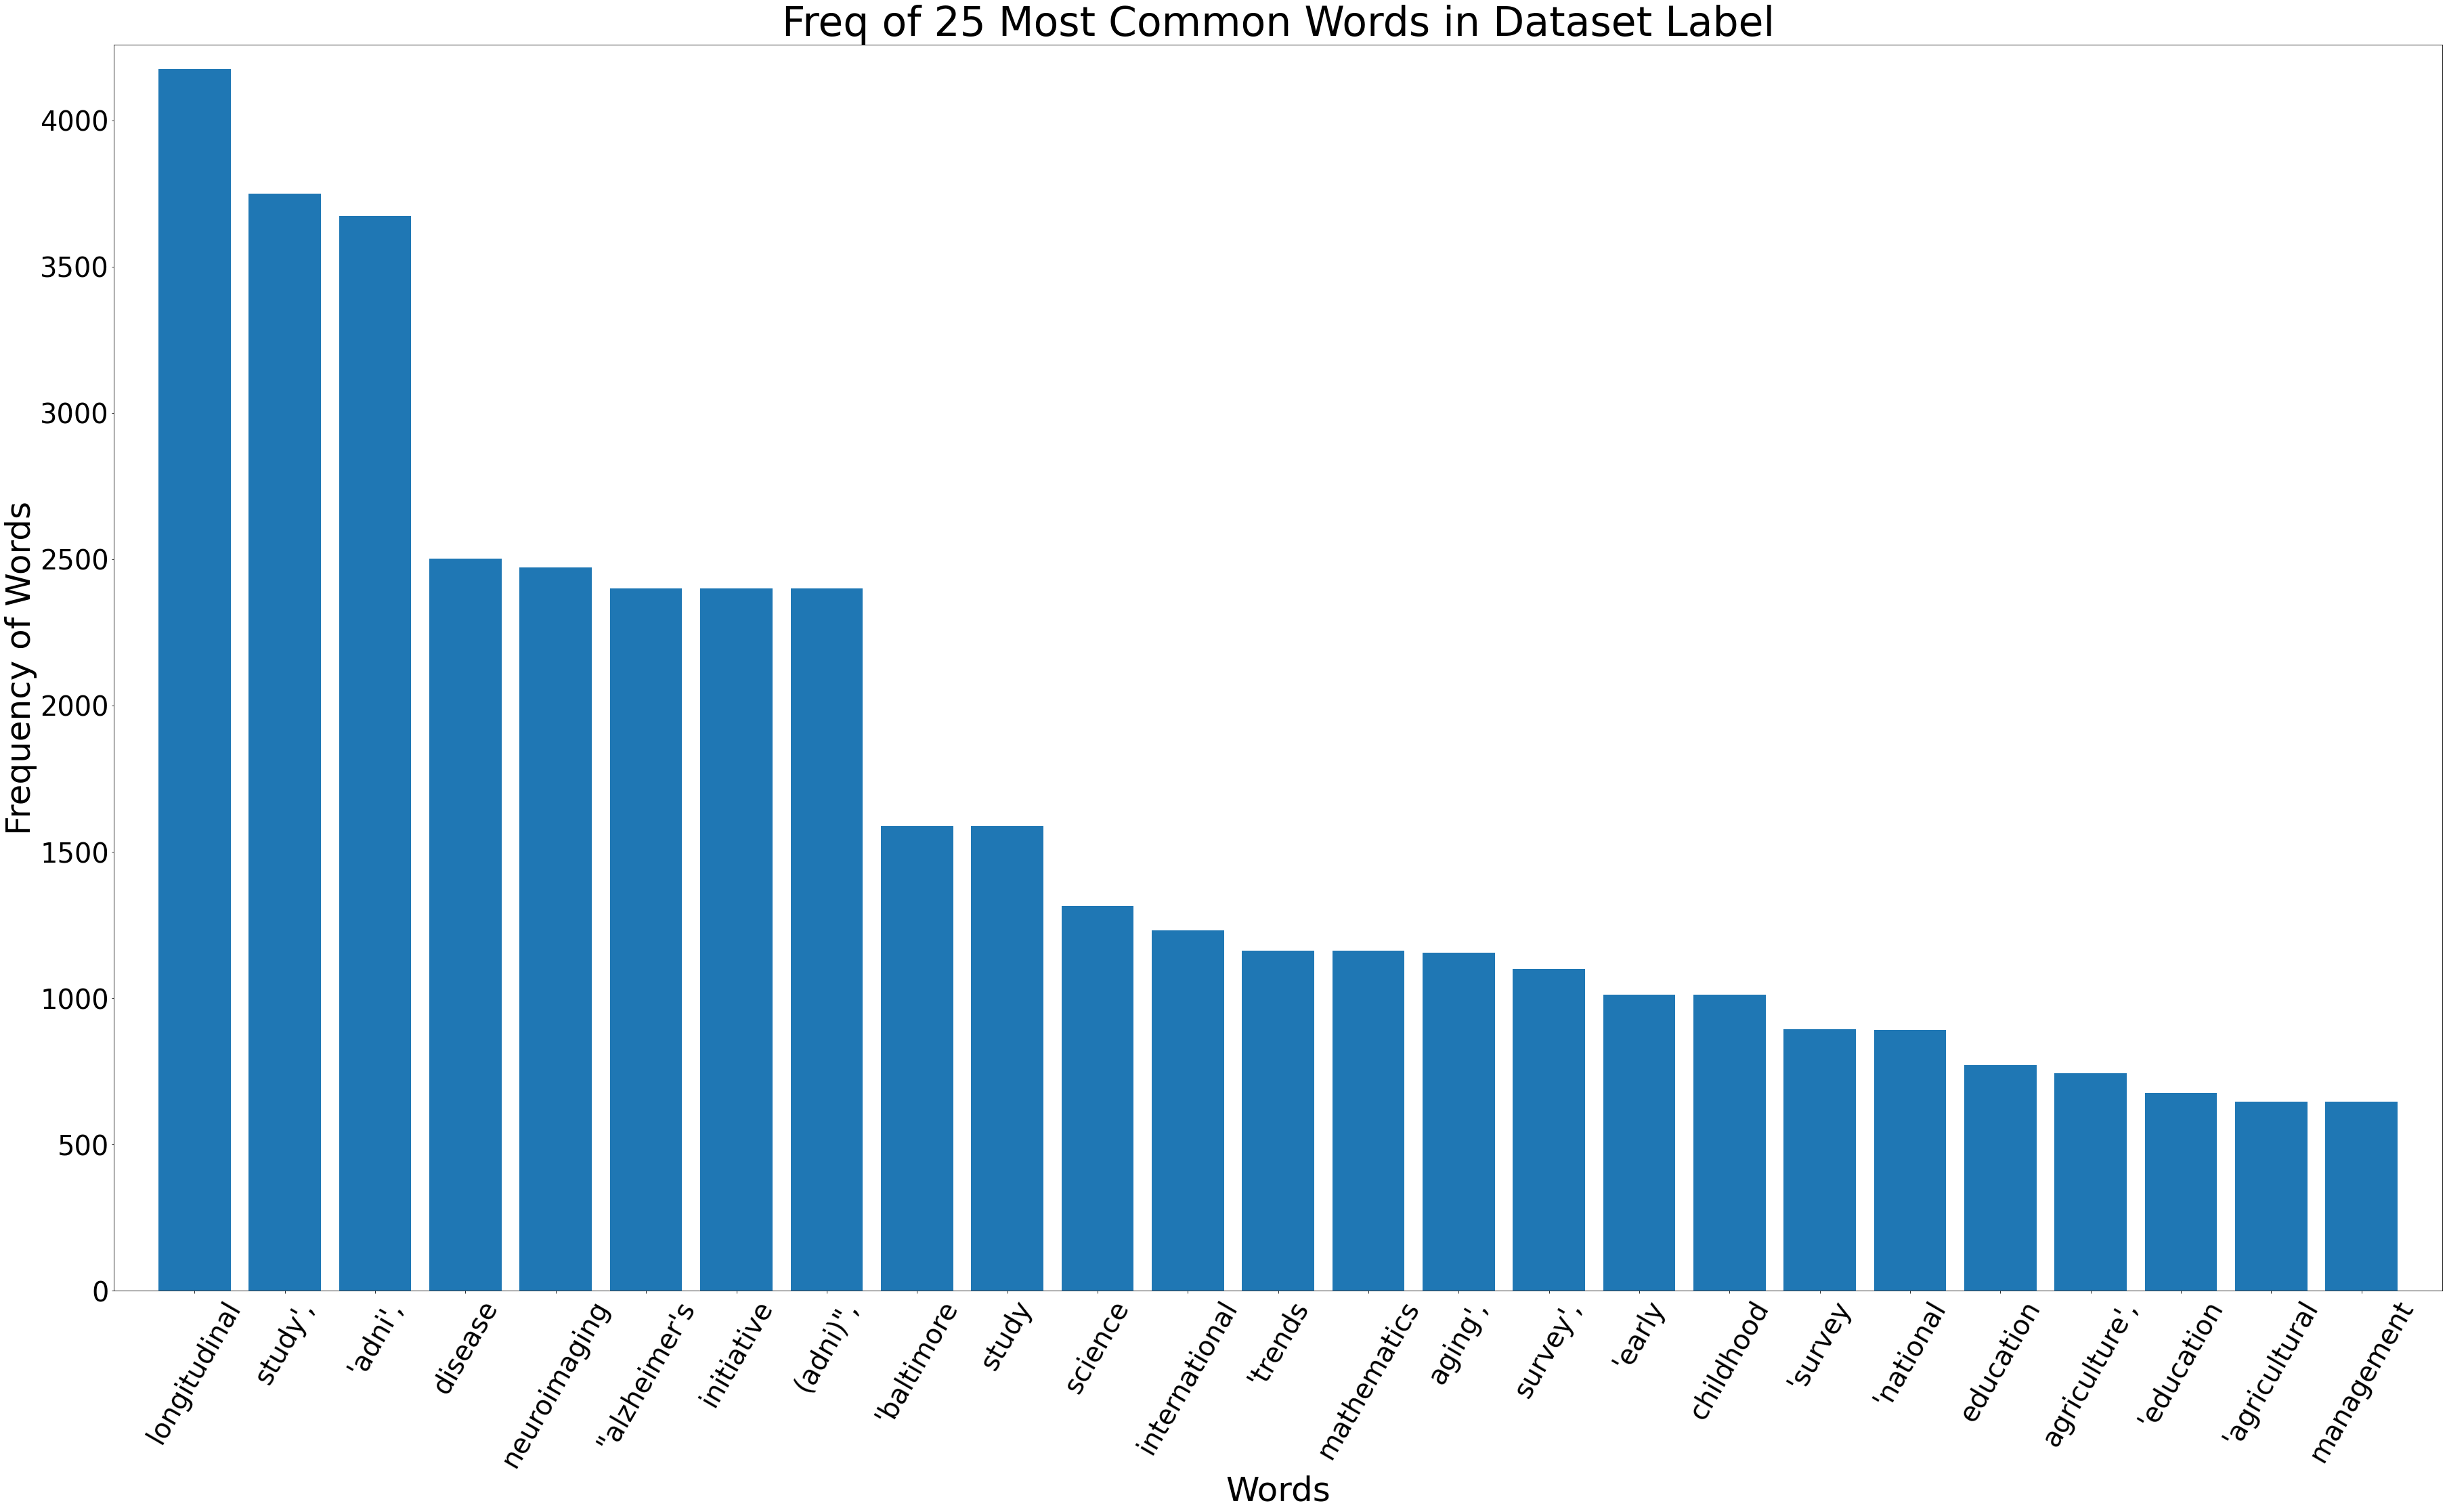

In [13]:
x,y = zip(*Counter(dataset_label_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Dataset Label', fontsize=60)
plt.show()

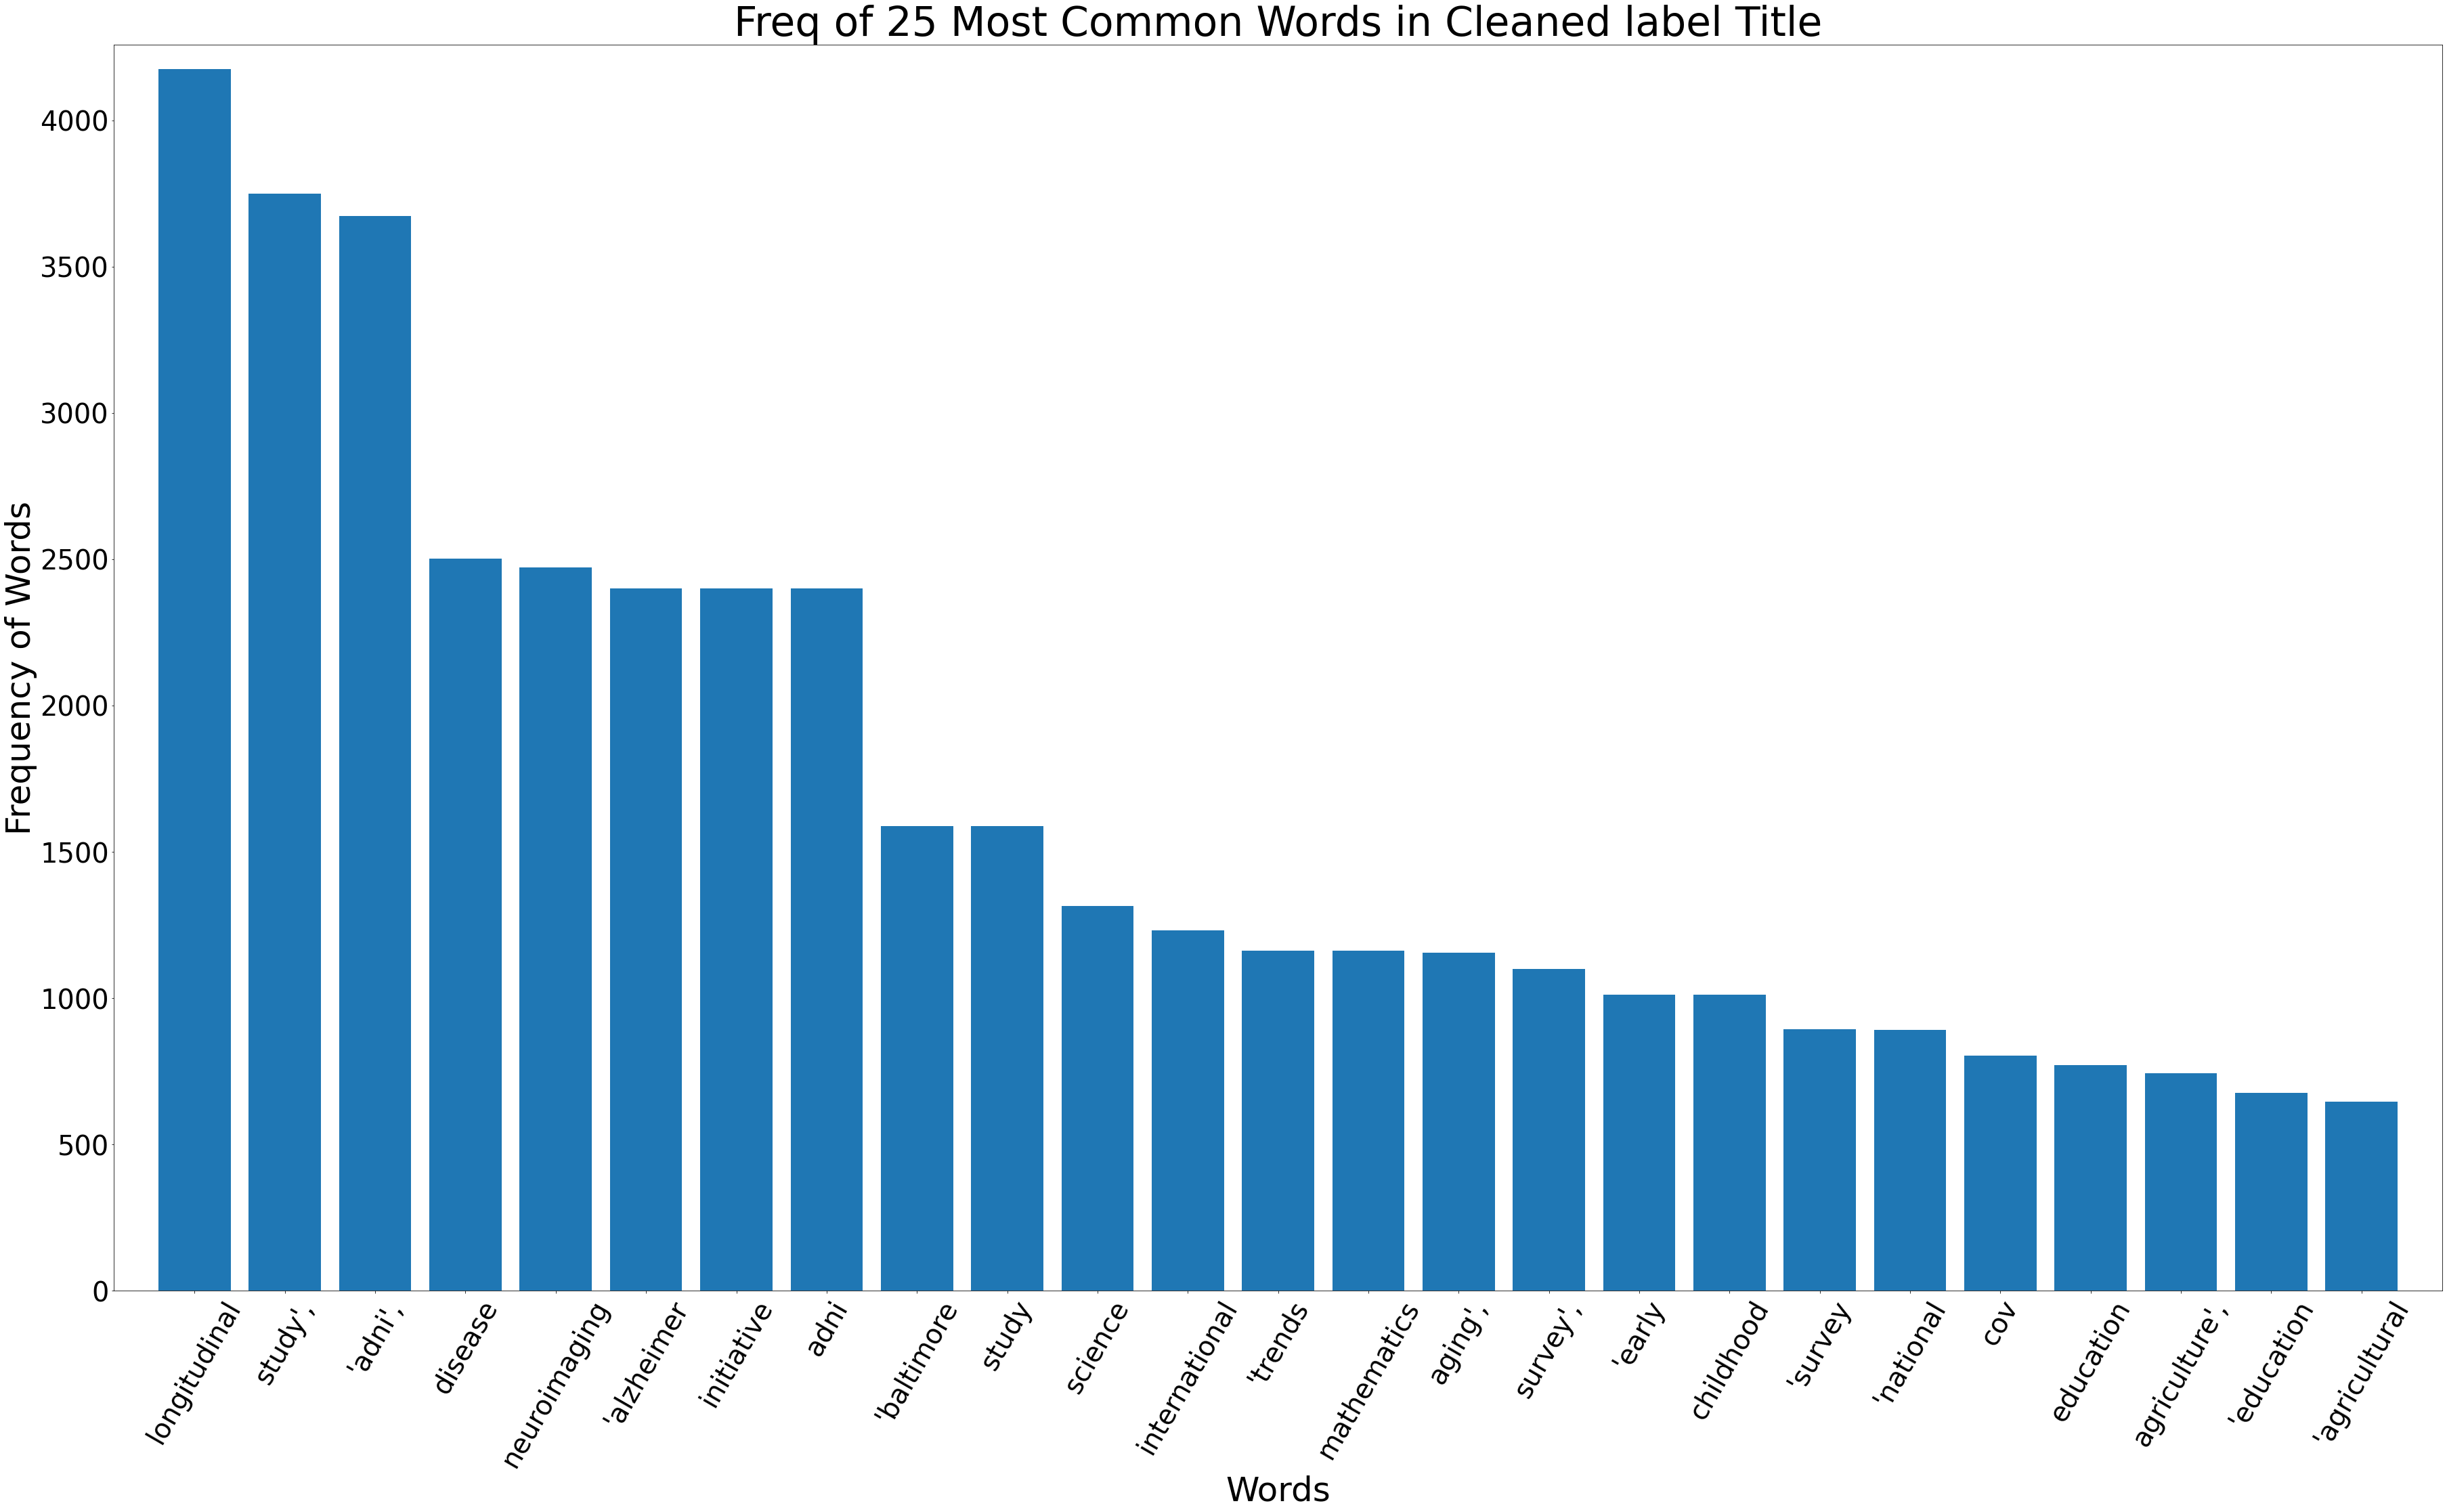

In [14]:
x,y = zip(*Counter(cleaned_label_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Cleaned label Title', fontsize=60)
plt.show()

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


In [16]:
pubtitle = [x.lower() for x in train_data['pub_title'].unique()]
datasettitle = [x.lower() for x in train_data['dataset_title'].unique()]
datasetlabel = [x.lower() for x in train_data['dataset_label'].unique()]
cleanedlabel = [x.lower() for x in train_data['cleaned_label'].unique()]

Combine all data

In [17]:
combined_data=set(pubtitle+datasettitle+datasetlabel+cleanedlabel)
combined_data

{'indicators of school crime and safety, 2003. sixth edition.',
 'small changes in snacking behaviour: the potential impact on cvd mortality',
 'calculus teaching and learning in south korea',
 ' farm debt use by farms with crop insurance',
 'a hybrid machine learning model to predict and visualize nitrate concentration throughout the central valley aquifer, california, usa.',
 'hindcasting the impacts of land-use changes on bird communities with species distribution models of bird atlas data',
 '\xa0review of productivity accounts\xa0',
 'demographic differences in patterns of youth out-of-school time activity participation',
 'multi-resolution graph neural network for identifying disease-specific variations in brain connectivity',
 'secondary school science teacher education and quality control in korea based on the teacher qualifications and the teacher employment test in korea',
 'spatial and numerical predictors of measurement performance: the moderating effects of community incom

In [18]:
sample_data=pd.read_csv("sample_submission.csv")
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                4 non-null      object 
 1   PredictionString  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [19]:
test_files = os.listdir('test')
test_files

['2100032a-7c33-4bff-97ef-690822c43466.json',
 '2f392438-e215-4169-bebf-21ac4ff253e1.json',
 '3f316b38-1a24-45a9-8d8c-4e05a42257c6.json',
 '8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60.json']

In [27]:
def get_text(filename, test=False):
    if test:
        df = pd.read_json('test/{}.json'.format(filename))
    else:
        df = pd.read_json('train/{}.json'.format(filename))
    text = " ".join(list(df['text']))
    return text

In [28]:
def clean_text(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()

In [29]:
test = pd.DataFrame({'Id':test_files})
test['Id'] = test['Id'].apply(lambda x : x.split('.')[0])
test['text'] = test['Id'].apply(get_text)
test

,Id,text
0,2100032a-7c33-4bff-97ef-690822c43466,Cognitive deficits and reduced educational ach...
1,2f392438-e215-4169-bebf-21ac4ff253e1,This report describes how the education system...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,"Cape Hatteras National Seashore (CAHA), locate..."
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,A significant body of research has been conduc...


In [31]:
labels = []
for i in sample_data['Id']:
    dataset = test[test['Id'] == i].text.str.cat(sep='\n').lower()
    label = []
    for j in combined_data:
        if j in dataset:
            label.append(clean_text(j))
    labels.append('|'.join(label))

In [32]:
result = pd.DataFrame()
result['Id'] = sample_data['Id']
result['PredictionString'] = labels

In [33]:
result

,Id,PredictionString
0,2100032a-7c33-4bff-97ef-690822c43466,adni|alzheimer s disease neuroimaging initiati...
1,2f392438-e215-4169-bebf-21ac4ff253e1,common core of data|nces common core of data|i...
2,3f316b38-1a24-45a9-8d8c-4e05a42257c6,slosh model|sea lake and overland surges from ...
3,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,rural urban continuum codes


In [34]:
result.to_csv('result.csv', index=False)

In [35]:
result_data=pd.read_csv('result.csv')
result_data.shape

(4, 2)